<a href="https://colab.research.google.com/github/Ziyangirova/VKR/blob/main/VKR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('seaborn-pastel')
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

<ipython-input-1-f182074f356e>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  matplotlib.style.use('seaborn-pastel')


Загрузка датасетов

In [2]:
X_bp = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/VKR/X_bp.xlsx', index_col=0)
X_bp.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  
0                    220.0  
1                    220.0  
2                    220.0  
3                    220.0  
4                    220.0

In [3]:
X_bp.shape

(1023, 10)

In [4]:
X_nup = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/VKR/X_nup.xlsx', index_col=0)
X_nup.head()

Угол нашивки, град  Шаг нашивки  Плотность нашивки
0                   0          4.0               57.0
1                   0          4.0               60.0
2                   0          4.0               70.0
3                   0          5.0               47.0
4                   0          5.0               57.0

In [5]:
X_nup.shape

(1040, 3)

Объединение датасетов

In [6]:
X_set = X_bp.join(X_nup, how='inner')
X_set.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                        30.00                        22.267857   
1                        50.00                        23.750000   
2                        49.90                        33.000000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                100.000000                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                    220.0                   0          4.0               57.0  
1                    220.0                   0          4.0               60.0  
2                    220.0                   0          4.0               70.0  
3                    220.0                   0          5.0               47.0  
4                    220.0                   0          5.0               57.0

Анализ датасета

In [7]:
X_set.shape

(1023, 13)

In [8]:
X_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [9]:
X_set.isnull().sum()

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [10]:
#количество уникальных значений
X_set.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [11]:
#проверка на наличие дубликатов
X_set.duplicated().sum()

0

In [12]:
X_set.describe().T

count         mean         std  \
Соотношение матрица-наполнитель       1023.0     2.930366    0.913222   
Плотность, кг/м3                      1023.0  1975.734888   73.729231   
модуль упругости, ГПа                 1023.0   739.923233  330.231581   
Количество отвердителя, м.%           1023.0   110.570769   28.295911   
Содержание эпоксидных групп,%_2       1023.0    22.244390    2.406301   
Температура вспышки, С_2              1023.0   285.882151   40.943260   
Поверхностная плотность, г/м2         1023.0   482.731833  281.314690   
Модуль упругости при растяжении, ГПа  1023.0    73.328571    3.118983   
Прочность при растяжении, МПа         1023.0  2466.922843  485.628006   
Потребление смолы, г/м2               1023.0   218.423144   59.735931   
Угол нашивки, град                    1023.0    44.252199   45.015793   
Шаг нашивки                           1023.0     6.899222    2.563467   
Плотность нашивки                     1023.0    57.153929   12.350969   

                                              min          25%          50%  \
Соотношение матрица-наполнитель          0.389403     2.317887     2.906878   
Плотность, кг/м3                      1731.764635  1924.155467  1977.621657   
модуль упругости, ГПа                    2.436909   500.047452   739.664328   
Количество отвердителя, м.%             17.740275    92.443497   110.564840   
Содержание эпоксидных групп,%_2         14.254985    20.608034    22.230744   
Температура вспышки, С_2               100.000000   259.066528   285.896812   
Поверхностная плотность, г/м2            0.603740   266.816645   451.864365   
Модуль упругости при растяжении, ГПа    64.054061    71.245018    73.268805   
Прочность при растяжении, МПа         1036.856605  2135.850448  2459.524526   
Потребление смолы, г/м2                 33.803026   179.627520   219.198882   
Угол нашивки, град                       0.000000     0.000000     0.000000   
Шаг нашивки                              0.000000     5.080033     6.916144   
Плотность нашивки                        0.000000    49.799212    57.341920   

                                              75%          max  
Соотношение матрица-наполнитель          3.552660     5.591742  
Плотность, кг/м3                      2021.374375  2207.773481  
модуль упругости, ГПа                  961.812526  1911.536477  
Количество отвердителя, м.%            129.730366   198.953207  
Содержание эпоксидных групп,%_2         23.961934    33.000000  
Температура вспышки, С_2               313.002106   413.273418  
Поверхностная плотность, г/м2          693.225017  1399.542362  
Модуль упругости при растяжении, ГПа    75.356612    82.682051  
Прочность при растяжении, МПа         2767.193119  3848.436732  
Потребление смолы, г/м2                257.481724   414.590628  
Угол нашивки, град                      90.000000    90.000000  
Шаг нашивки                              8.586293    14.440522  
Плотность нашивки                       64.944961   103.988901

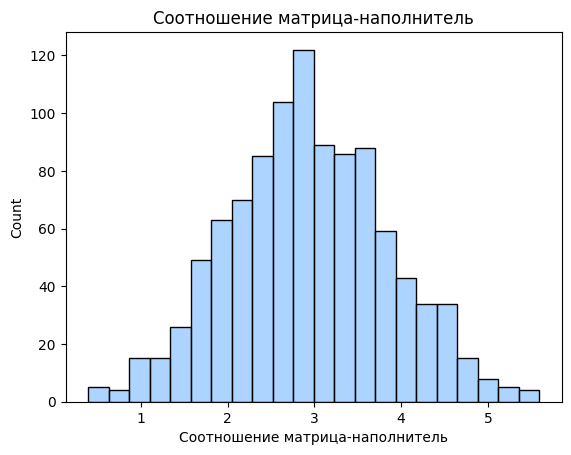

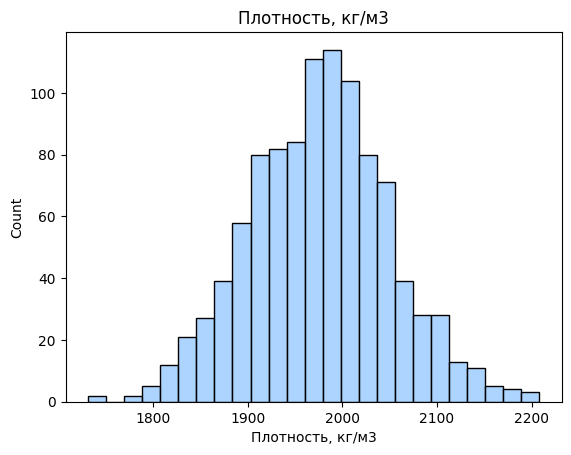

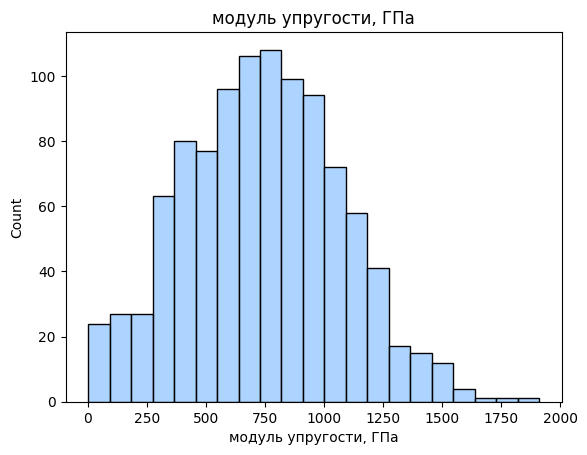

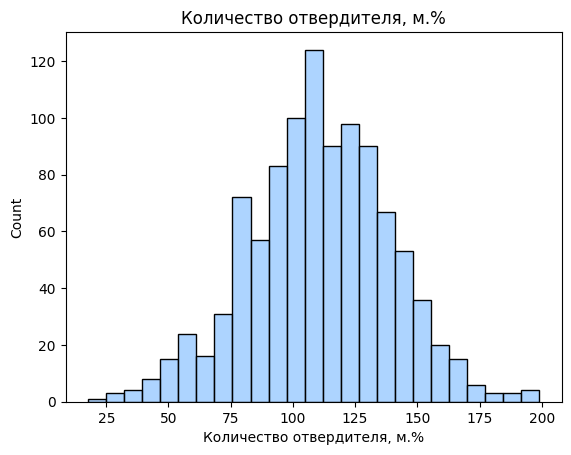

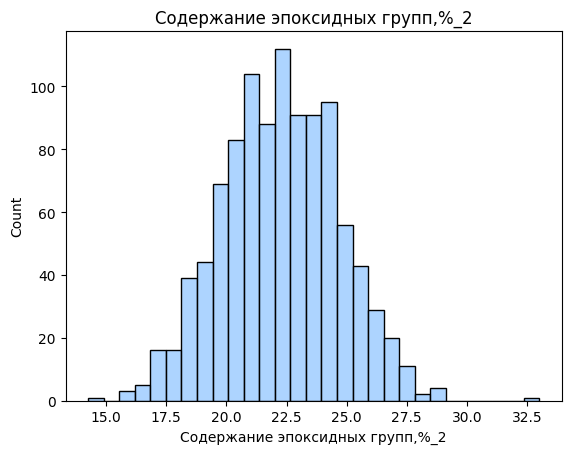

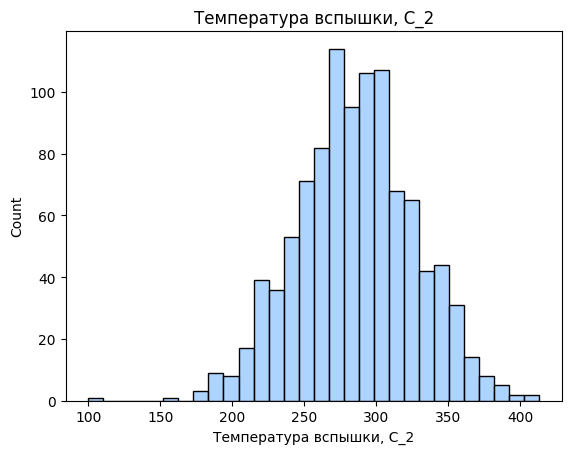

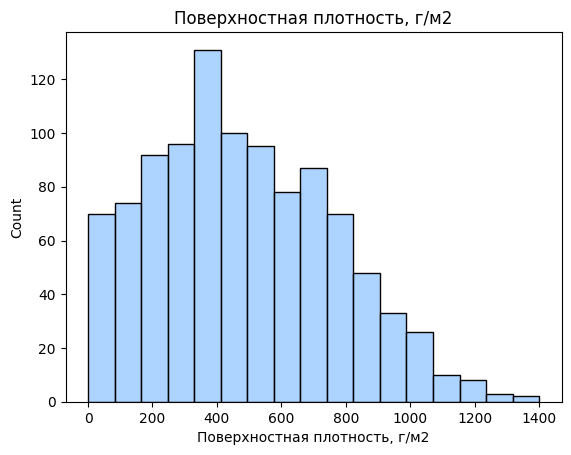

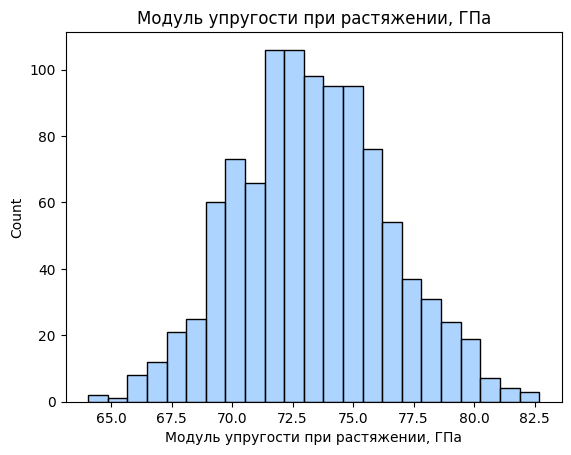

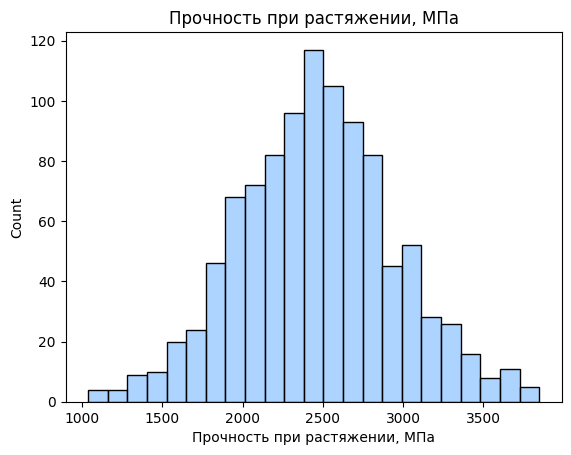

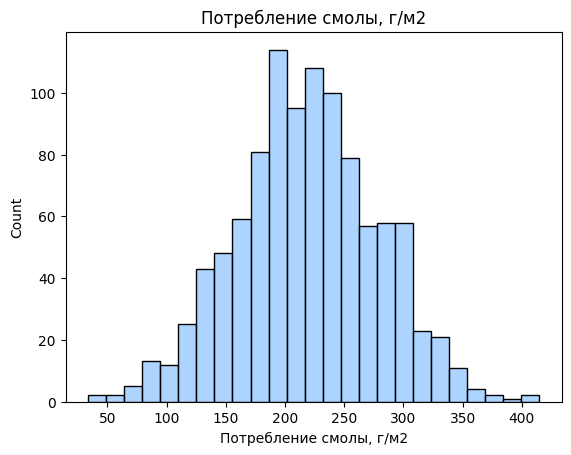

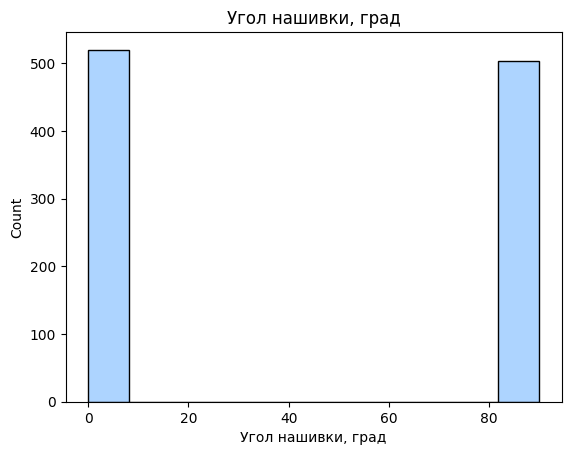

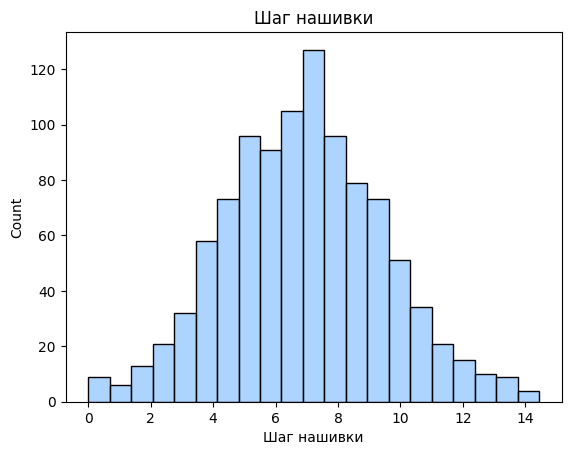

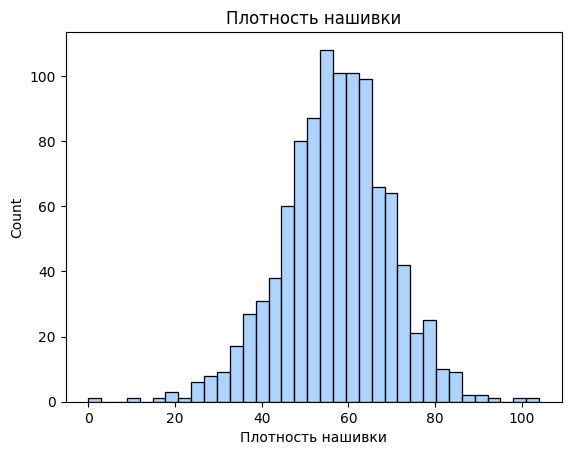

In [13]:
#распределения показателей в каждом столбце:
for column in X_set.columns:
	plt.figure()
	sns.histplot(X_set[column])
	plt.title(column)

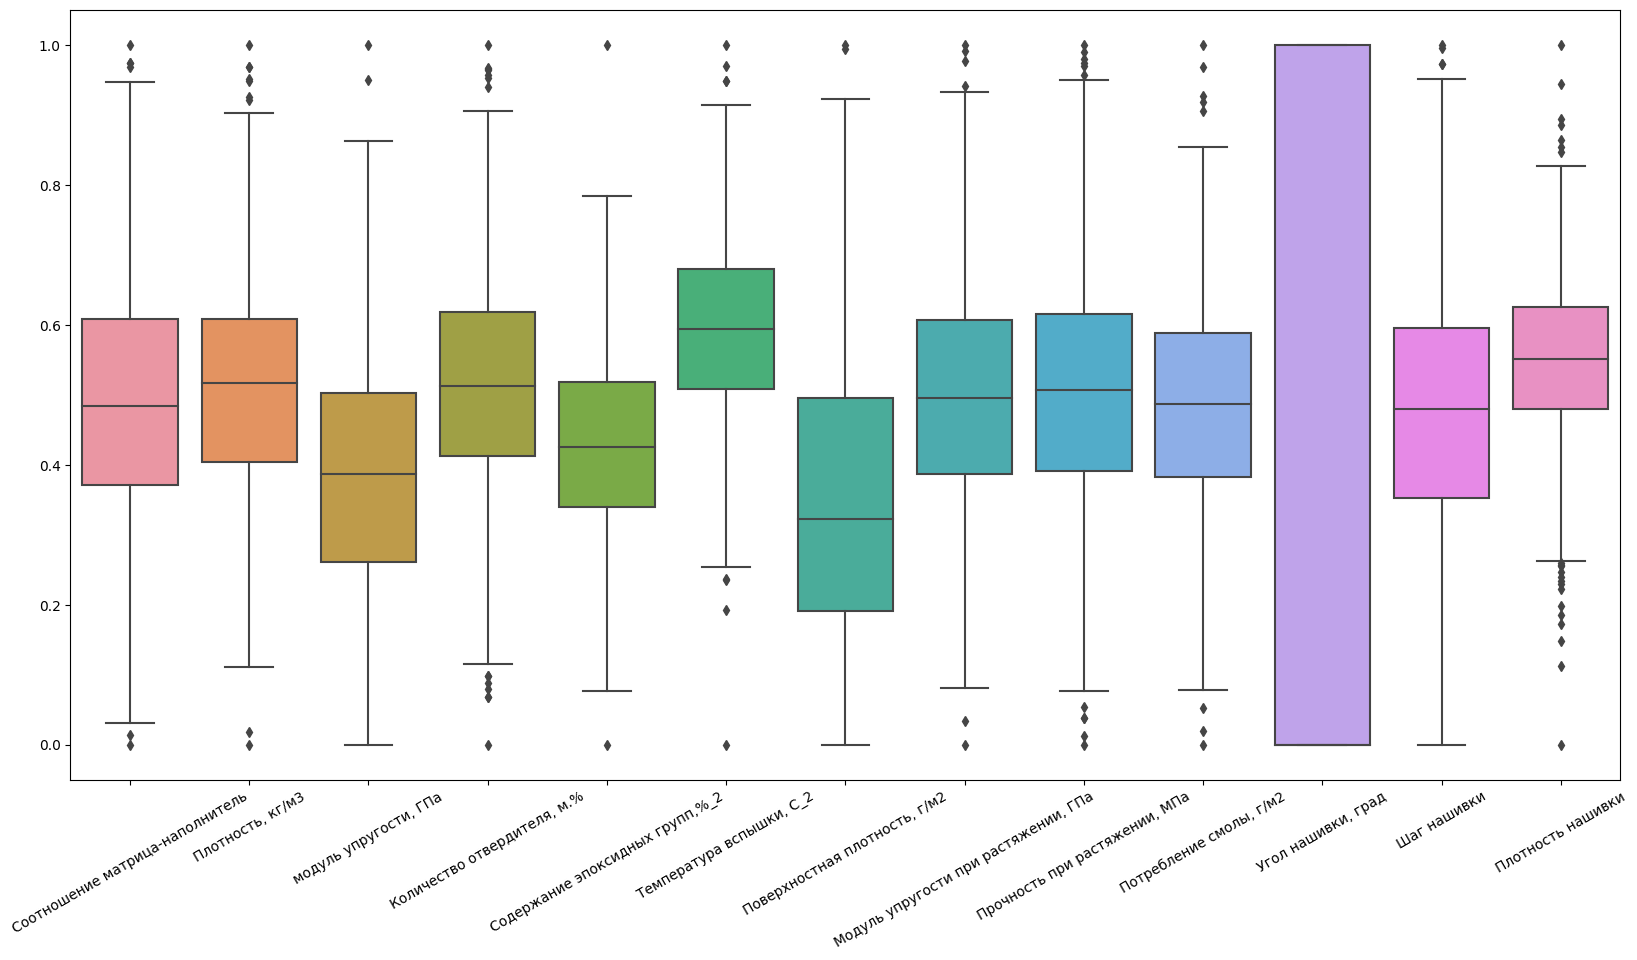

In [14]:
#boxplot
MinMaxScaler = preprocessing.MinMaxScaler()
X_set_for_visual = pd.DataFrame(MinMaxScaler.fit_transform(X_set), columns = X_set.columns) #датасет создан для удобной визуализации
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.boxplot(data = X_set_for_visual, orient='v', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30);
plt.show()

<Axes: >

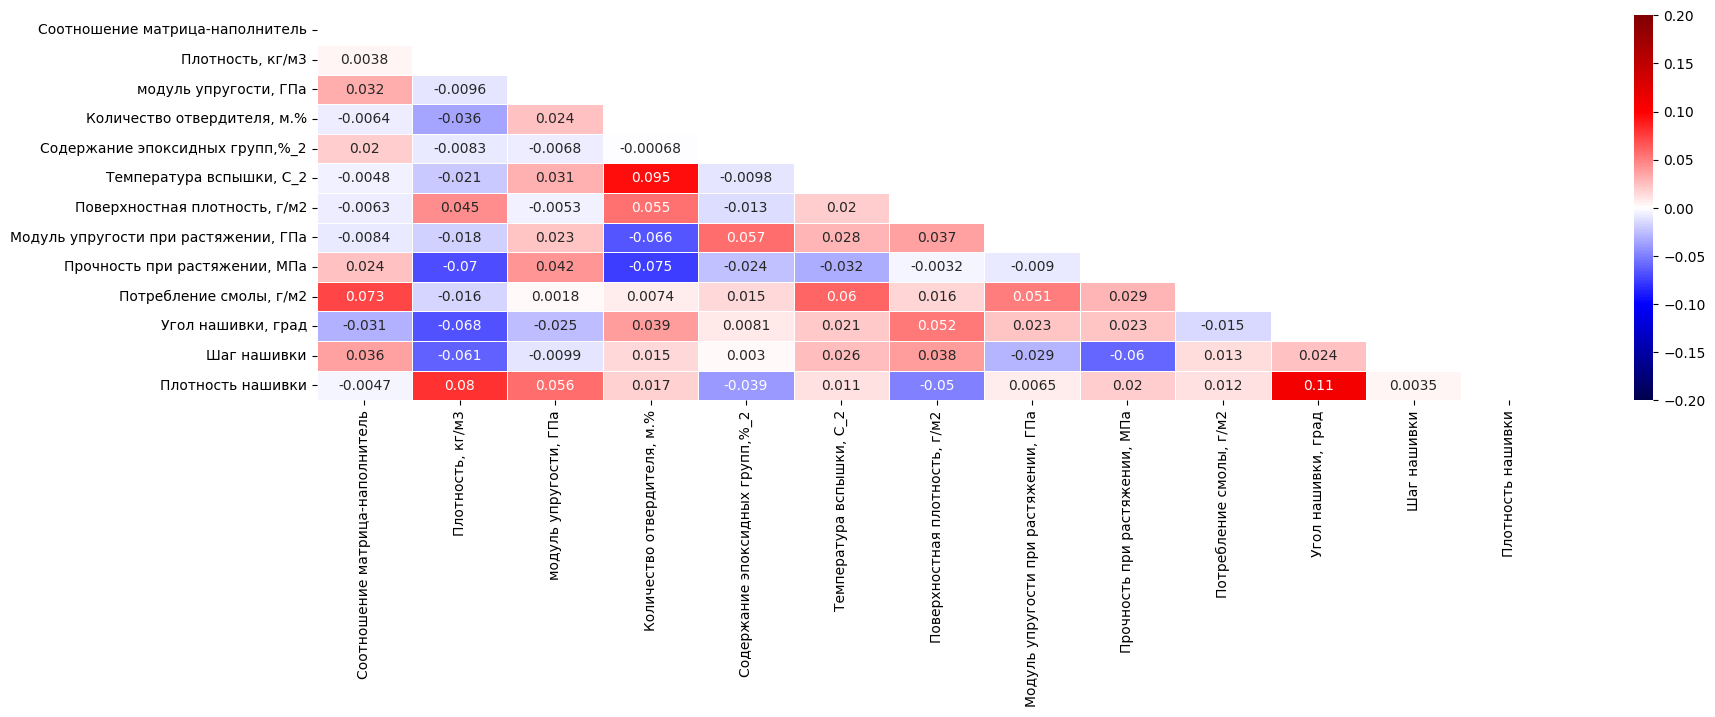

In [15]:
#тепловая карта
fig, ax = plt.subplots(figsize=(20, 5))
mask = np.triu(X_set.corr())
sns.heatmap(X_set.corr(), vmin = -0.2, vmax = 0.2, cmap='seismic', linewidth=0.5, annot=True, mask = mask)

In [16]:
#создание переменной со списком всех параметров, в которых есть выбросы
X_set.columns
column_list_outliers = ["Соотношение матрица-наполнитель",
                 "Плотность, кг/м3",
                 "модуль упругости, ГПа",
                 "Количество отвердителя, м.%",
                 "Содержание эпоксидных групп,%_2",
                 "Температура вспышки, С_2",
                 "Поверхностная плотность, г/м2",
                 "Модуль упругости при растяжении, ГПа",
                 "Прочность при растяжении, МПа",
                 "Потребление смолы, г/м2",
                 "Шаг нашивки",
                 "Плотность нашивки"]

In [17]:
for i in column_list_outliers:
    Q3, Q1 = np.percentile(X_set.loc[:,i],[75, 25])
    IQR = Q3 - Q1
    max = Q3 + (1.5*IQR)
    min = Q1 - (1.5*IQR)
    X_set.loc[X_set[i] < min,i] = np.nan
    X_set.loc[X_set[i] > max,i] = np.nan

In [18]:
X_set1 = X_set

In [19]:
X_set_clean = X_set1.dropna(axis=0, how='any')

In [20]:
X_set_clean.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
1                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   
5                         2.767918            2000.0             748.000000   
6                         2.569620            1910.0             807.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
1                        50.00                        23.750000   
3                       129.00                        21.250000   
4                       111.86                        22.267857   
5                       111.86                        22.267857   
6                       111.86                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
1                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   
5                284.615385                          210.0   
6                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
1                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   
5                                  70.0                         3000.0   
6                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
1                    220.0                   0          4.0               60.0  
3                    220.0                   0          5.0               47.0  
4                    220.0                   0          5.0               57.0  
5                    220.0                   0          5.0               60.0  
6                    220.0                   0          5.0               70.0

In [21]:
X_set_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 1 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       936 non-null    float64
 1   Плотность, кг/м3                      936 non-null    float64
 2   модуль упругости, ГПа                 936 non-null    float64
 3   Количество отвердителя, м.%           936 non-null    float64
 4   Содержание эпоксидных групп,%_2       936 non-null    float64
 5   Температура вспышки, С_2              936 non-null    float64
 6   Поверхностная плотность, г/м2         936 non-null    float64
 7   Модуль упругости при растяжении, ГПа  936 non-null    float64
 8   Прочность при растяжении, МПа         936 non-null    float64
 9   Потребление смолы, г/м2               936 non-null    float64
 10  Угол нашивки, град                    936 non-null    int64  
 11  Шаг нашивки       

In [22]:
X_set_clean.shape

(936, 13)

<Axes: >

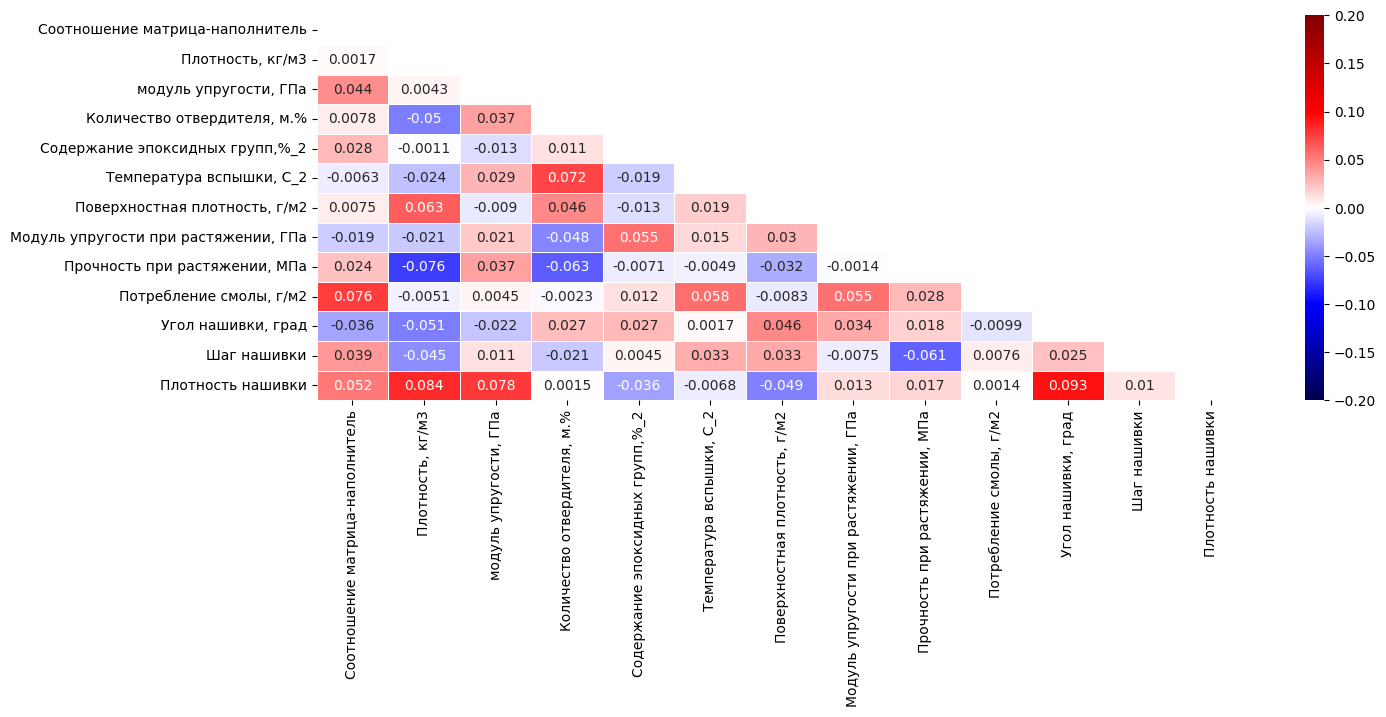

In [23]:
#определение зависимостей после удаления выбросов
fig, ax = plt.subplots(figsize=(15, 5))
mask = np.triu(X_set_clean.corr())
sns.heatmap(X_set_clean.corr(), vmin = -0.2, vmax = 0.2, cmap='seismic', linewidth=0.5, annot=True, mask = mask)

In [24]:
X_set_mean = X_set.fillna(X_set.mean())

In [25]:
X_set_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

In [26]:
X_set_mean.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                   110.558048                        22.267857   
1                    50.000000                        23.750000   
2                    49.900000                        22.241680   
3                   129.000000                        21.250000   
4                   111.860000                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                285.949508                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                    220.0                   0          4.0               57.0  
1                    220.0                   0          4.0               60.0  
2                    220.0                   0          4.0               70.0  
3                    220.0                   0          5.0               47.0  
4                    220.0                   0          5.0               57.0

<Axes: >

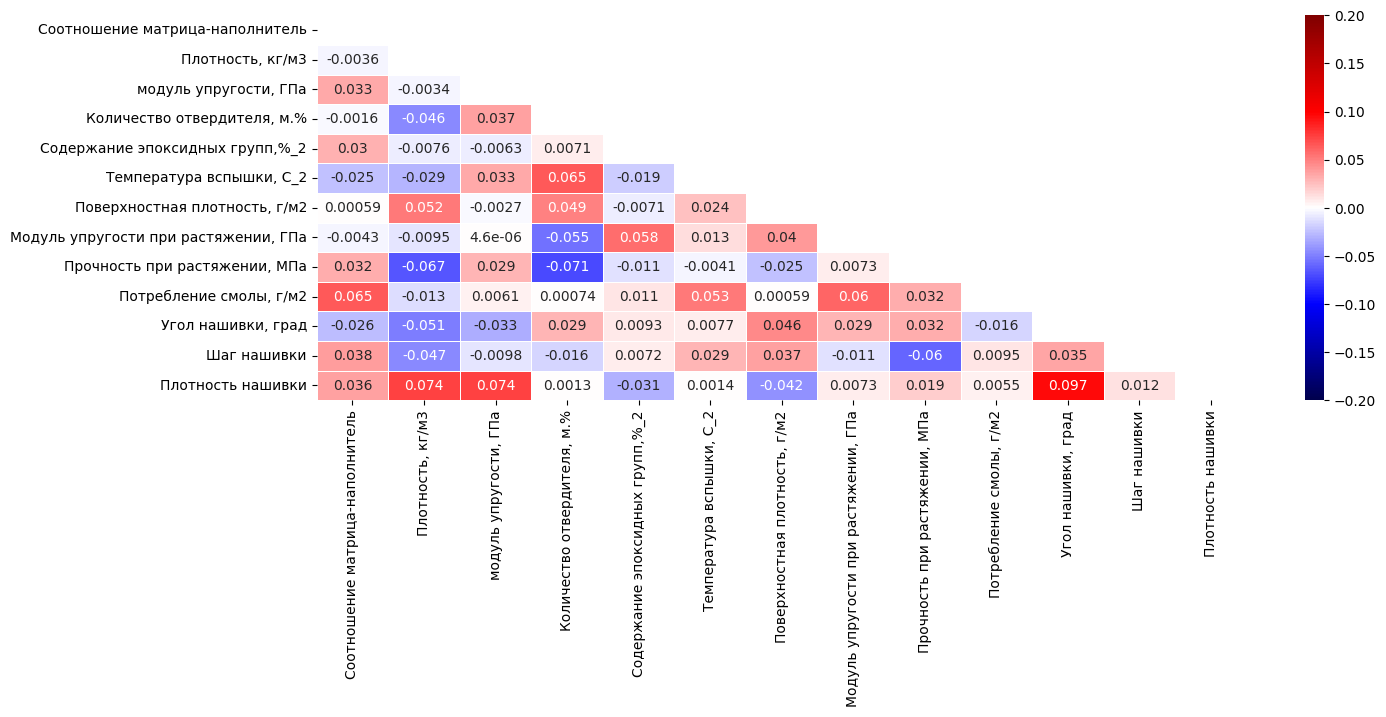

In [27]:
fig, ax = plt.subplots(figsize=(15, 5))
mask = np.triu(X_set_mean.corr())
sns.heatmap(X_set_mean.corr(), vmin = -0.2, vmax = 0.2, cmap='seismic', linewidth=0.5, annot=True, mask = mask)

In [28]:
#Дальнейшую работу проводим с датасетом, в котором выбросы заменены на значения mean
df = X_set_mean
df.head()

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                         1.857143            2030.0             738.736842   
1                         1.857143            2030.0             738.736842   
2                         1.857143            2030.0             738.736842   
3                         1.857143            2030.0             738.736842   
4                         2.771331            2030.0             753.000000   

   Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                   110.558048                        22.267857   
1                    50.000000                        23.750000   
2                    49.900000                        22.241680   
3                   129.000000                        21.250000   
4                   111.860000                        22.267857   

   Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                285.949508                          210.0   
1                284.615385                          210.0   
2                284.615385                          210.0   
3                300.000000                          210.0   
4                284.615385                          210.0   

   Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                                  70.0                         3000.0   
1                                  70.0                         3000.0   
2                                  70.0                         3000.0   
3                                  70.0                         3000.0   
4                                  70.0                         3000.0   

   Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  Плотность нашивки  
0                    220.0                   0          4.0               57.0  
1                    220.0                   0          4.0               60.0  
2                    220.0                   0          4.0               70.0  
3                    220.0                   0          5.0               47.0  
4                    220.0                   0          5.0               57.0

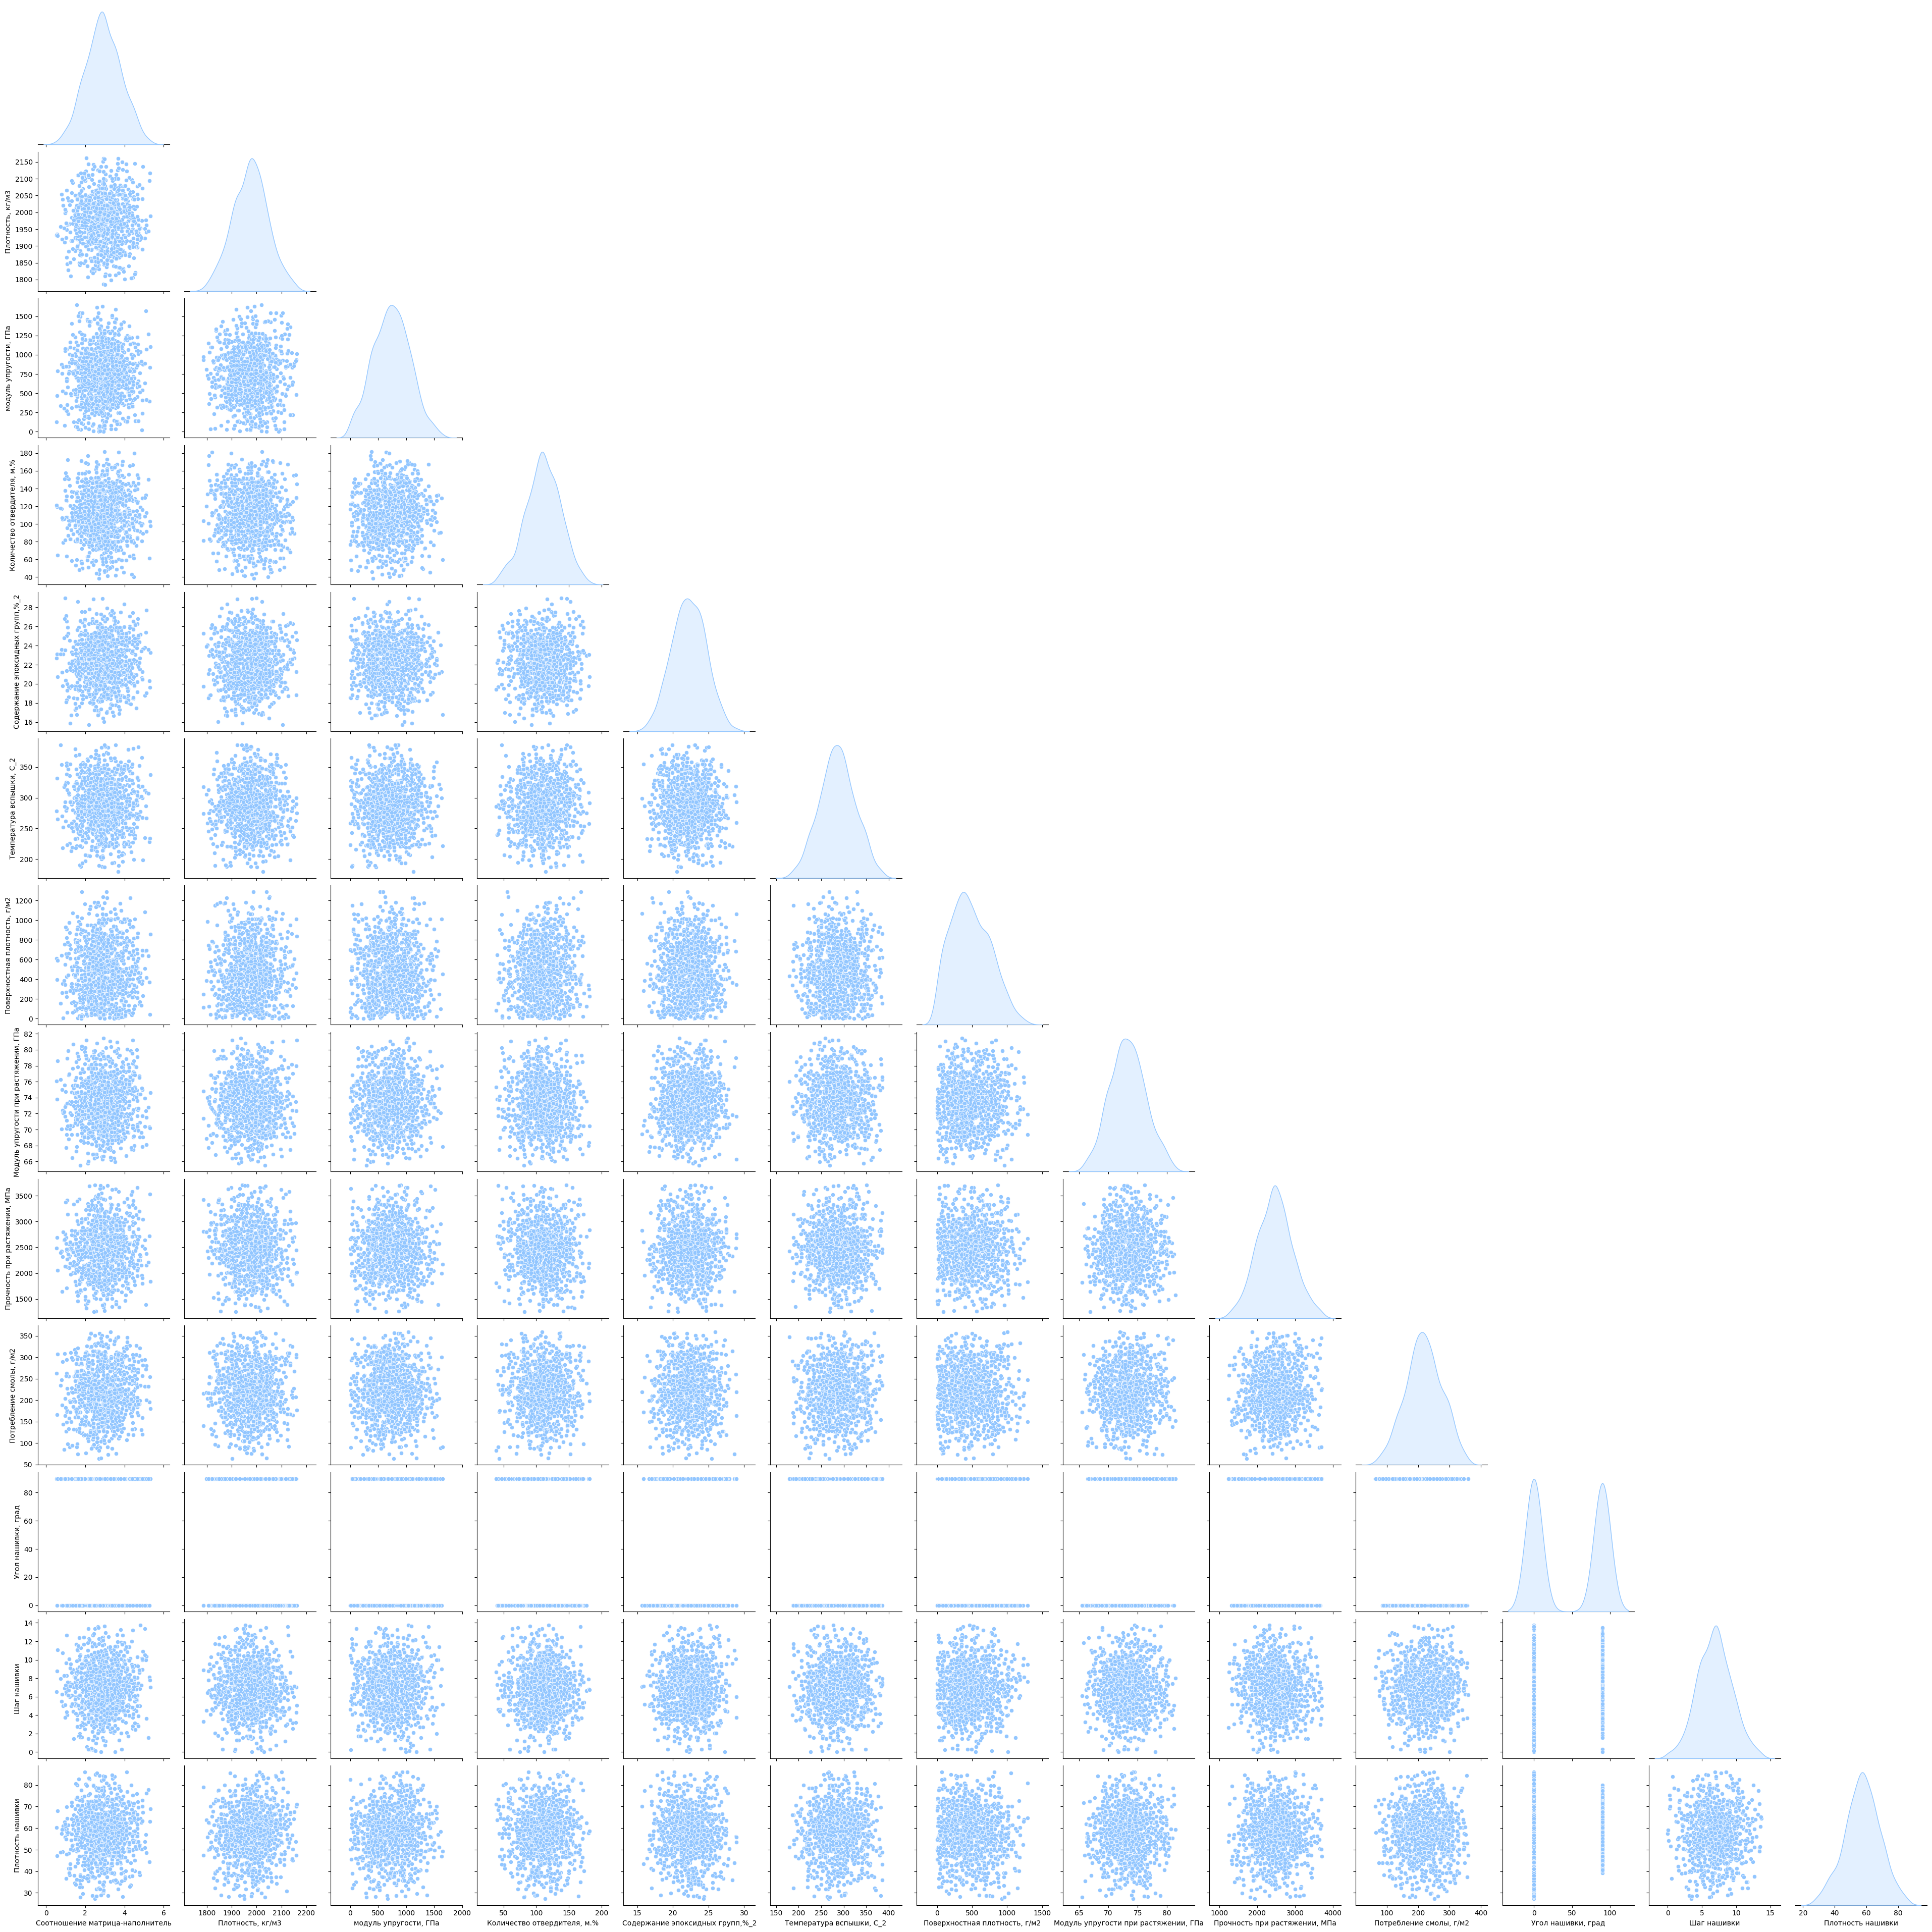

In [29]:
ax = sns.pairplot(df, diag_kind="kde", height = 3, corner = True)

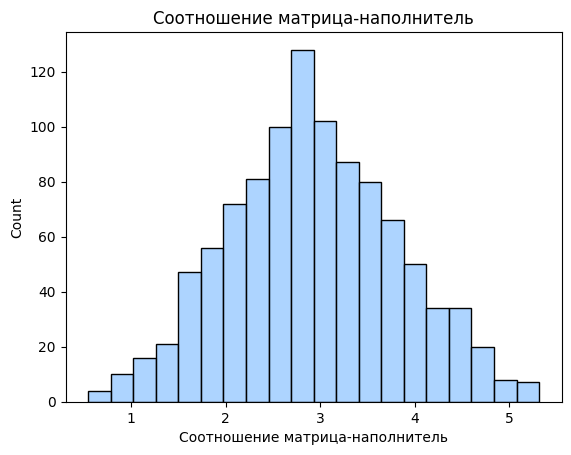

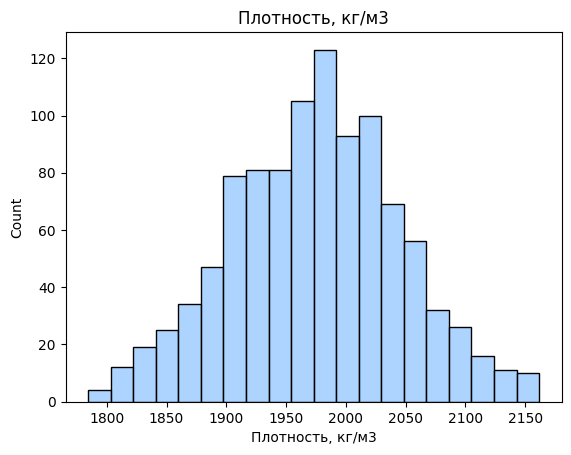

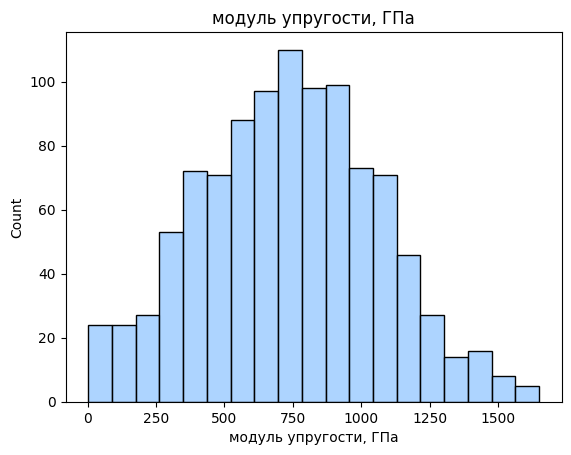

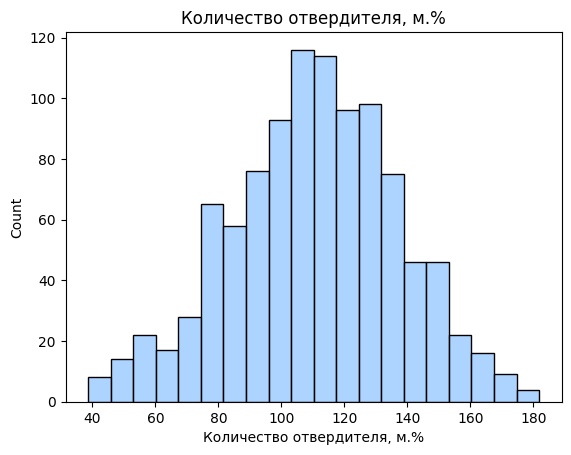

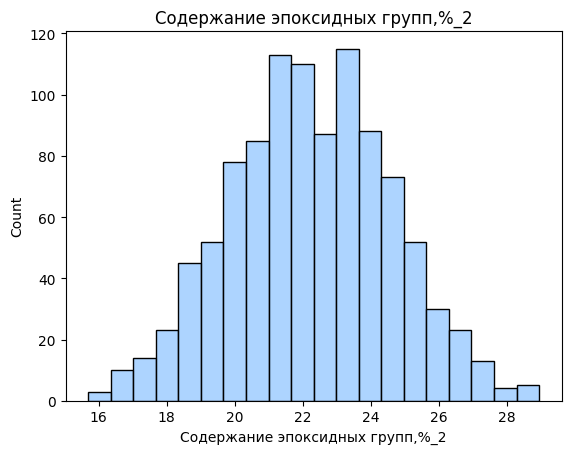

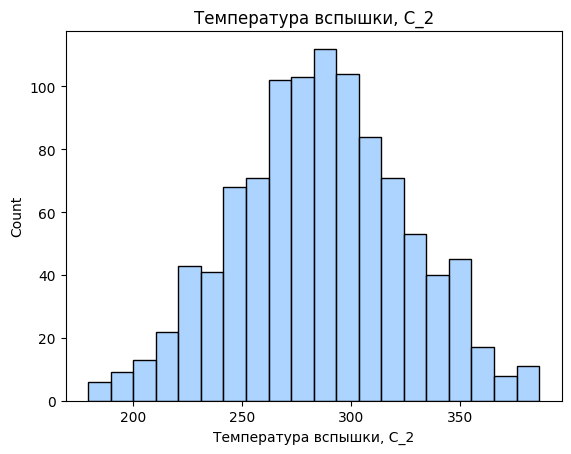

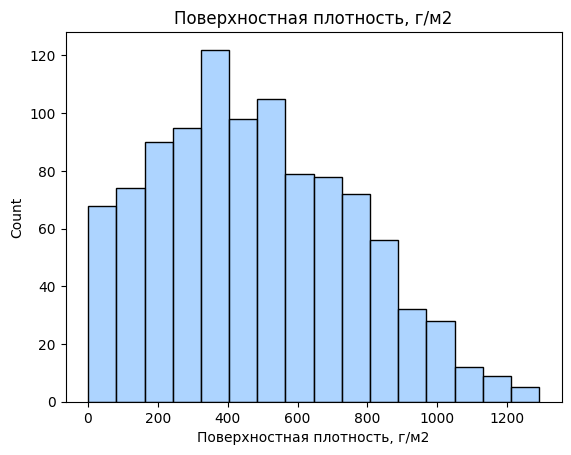

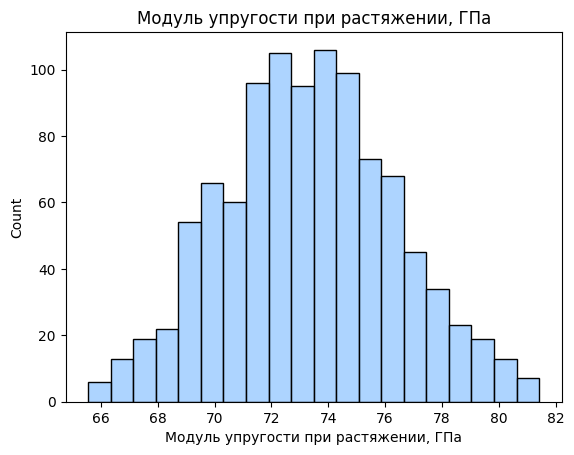

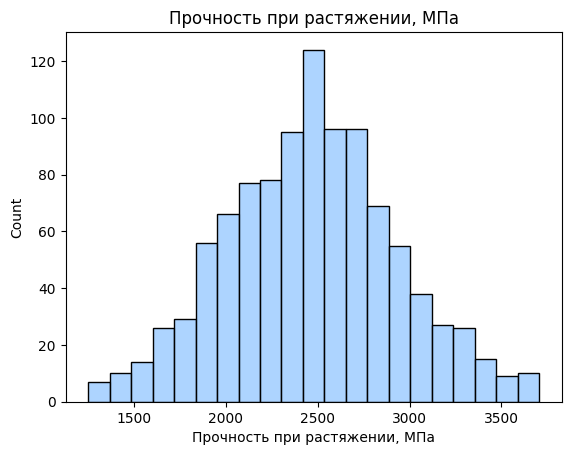

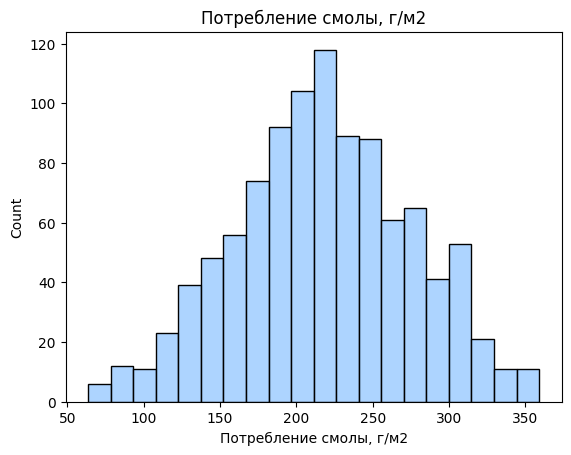

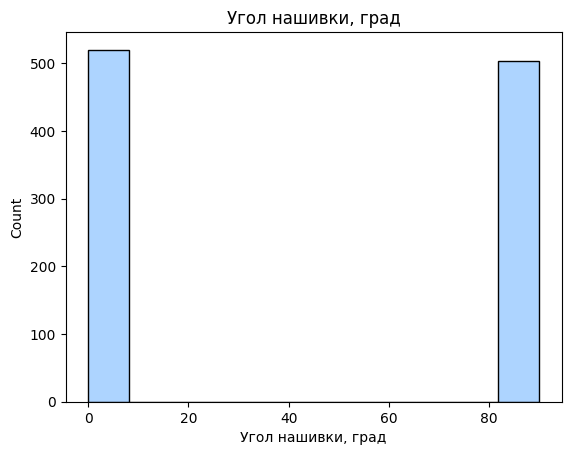

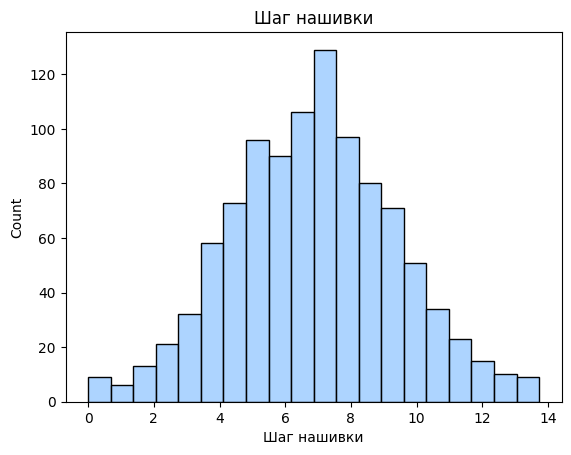

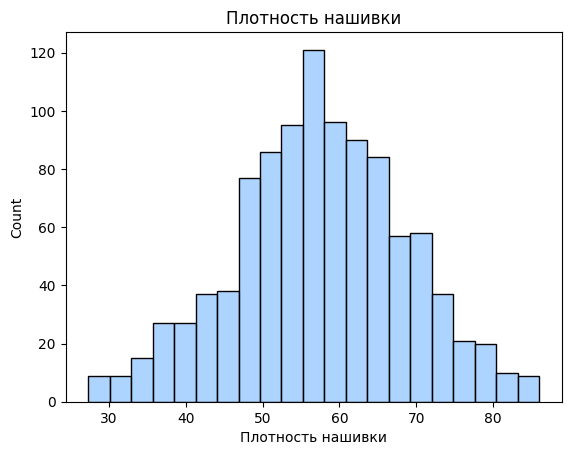

In [30]:
for column in df.columns:
	plt.figure()
	sns.histplot(df[column])
	plt.title(column)

In [32]:
#MinMaxScaler
minmax = preprocessing.MinMaxScaler()
col = df.columns
df_minmax_n = minmax.fit_transform(np.array(df[col]))
df_minmax = pd.DataFrame(data=df_minmax_n, columns=[col]) 
df_minmax.describe().T

count      mean       std  min  \
Соотношение матрица-наполнитель       1023.0  0.498844  0.187191  0.0   
Плотность, кг/м3                      1023.0  0.504592  0.187870  0.0   
модуль упругости, ГПа                 1023.0  0.446445  0.198214  0.0   
Количество отвердителя, м.%           1023.0  0.502162  0.186237  0.0   
Содержание эпоксидных групп,%_2       1023.0  0.493679  0.178708  0.0   
Температура вспышки, С_2              1023.0  0.515619  0.190405  0.0   
Поверхностная плотность, г/м2         1023.0  0.372145  0.215689  0.0   
Модуль упругости при растяжении, ГПа  1023.0  0.489020  0.191799  0.0   
Прочность при растяжении, МПа         1023.0  0.495005  0.189583  0.0   
Потребление смолы, г/м2               1023.0  0.522725  0.195289  0.0   
Угол нашивки, град                    1023.0  0.491691  0.500175  0.0   
Шаг нашивки                           1023.0  0.500310  0.183651  0.0   
Плотность нашивки                     1023.0  0.513109  0.189698  0.0   

                                           25%       50%       75%  max  
Соотношение матрица-наполнитель       0.372092  0.495399  0.629650  1.0  
Плотность, кг/м3                      0.371411  0.510844  0.626245  1.0  
модуль упругости, ГПа                 0.302135  0.447061  0.579819  1.0  
Количество отвердителя, м.%           0.378699  0.502162  0.632613  1.0  
Содержание эпоксидных групп,%_2       0.371013  0.492857  0.623384  1.0  
Температура вспышки, С_2              0.387036  0.515619  0.644492  1.0  
Поверхностная плотность, г/м2         0.206249  0.349615  0.535487  1.0  
Модуль упругости при растяжении, ГПа  0.361445  0.487331  0.615795  1.0  
Прочность при растяжении, МПа         0.364888  0.493717  0.613140  1.0  
Потребление смолы, г/м2               0.393568  0.523036  0.653680  1.0  
Угол нашивки, град                    0.000000  0.000000  1.000000  1.0  
Шаг нашивки                           0.369930  0.502022  0.624505  1.0  
Плотность нашивки                     0.391631  0.513109  0.635267  1.0

**2.1 Определение Модуля Упругости при растяжении, ГПа**

Наиболее выраженные зависимости с Модулем упругости при растяжении, Гпа:
*   Количество отвердителя, м.%;
*   Содержание эпоксидных групп,%_2;
*   Потребление смолы, г/м2

In [33]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [34]:
inputs_1 = ['Количество отвердителя, м.%', 'Содержание эпоксидных групп,%_2', 'Потребление смолы, г/м2']
output_1 = ['Модуль упругости при растяжении, ГПа']

X_1 = df_minmax[inputs_1]
y_1 = df[output_1]

In [35]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_1, y_1, train_size=0.3, random_state=1)
linear_model1 = LinearRegression()
linear_model1.fit(X_train1, y_train1)
y_pred_linear1 = linear_model1.predict(X_test1)

In [36]:
MAE_linear1 = mean_absolute_error(y_test1, y_pred_linear1)
MSE_linear1 = mean_squared_error(y_test1, y_pred_linear1)
R2_linear1 = r2_score(y_test1, y_pred_linear1)
ep_linear1 = MAE_linear1/y_test1.mean()[0] * 100
ac_linear1 = 100 - ep_linear1

In [37]:
print ('MAE_linear1', MAE_linear1)
print ('MSE_linear1', MSE_linear1)
print ('R2_linear1', R2_linear1)
print ('Ошибка', ep_linear1 )
print ('Точность модели', ac_linear1)

MAE_linear1 2.504425418896777
MSE_linear1 9.603235532922614
R2_linear1 -0.028178984195834644
Ошибка 3.420074073660458
Точность модели 96.57992592633954


In [ ]:
#import pickle
#pickle.dump(linear_model1, open('linear_model1.pkl', 'wb')

In [38]:
r_forest1 = RandomForestRegressor(n_estimators=15, max_depth=7, random_state=1)
r_forest1.fit(X_train1, np.ravel(y_train1))
y_pred_forest1 = r_forest1.predict(X_test1)

In [39]:
MAE_forest1 = mean_absolute_error(y_test1, y_pred_forest1)
MSE_forest1 = mean_squared_error(y_test1, y_pred_forest1)
R2_forest1 = r2_score(y_test1, y_pred_forest1)
ep_forest1 = MAE_forest1/y_test1.mean()[0] * 100
ac_forest1 = 100 - ep_forest1

In [40]:
print ('MAE_forest1', MAE_forest1)
print ('MSE_forest1', MSE_forest1)
print ('R2_forest1', R2_forest1)
print ('Ошибка модели', ep_forest1)
print ('Точность модели', ac_forest1)

MAE_forest1 2.566119237071396
MSE_forest1 10.393928196627428
R2_forest1 -0.11283520000893321
Ошибка модели 3.5043239085535576
Точность модели 96.49567609144644


In [41]:
kn1 = KNeighborsRegressor(n_neighbors=50)
kn1.fit(X_train1, y_train1)
y_pred_kn1 = kn1.predict(X_test1)

In [42]:
MAE_kn1 = mean_absolute_error(y_test1, y_pred_kn1)
MSE_kn1 = mean_squared_error(y_test1, y_pred_kn1)
R2_kn1 = r2_score(y_test1, y_pred_kn1)
ep_kn1 = MAE_kn1/y_test1.mean()[0]*100
ac_kn1 = 100 - ep_kn1

In [43]:
print ('MAE_kn1', MAE_kn1)
print ('MSE_kn1', MSE_kn1)
print ('R2_kn1', R2_kn1)
print ('Ошибка модели', ep_kn1)
print ('Точность модели', ac_kn1)

MAE_kn1 2.4890666892078244
MSE_kn1 9.493850104001407
R2_kn1 -0.01646753561077574
Ошибка модели 3.399100003992739
Точность модели 96.60089999600726


In [44]:
accuracy1 = pd.DataFrame({'Model': ['LinearRegression', 'RandomForestRegressor', 'KNeighborsRegressor'],
                         'MAE': [MAE_linear1, MAE_forest1, MAE_kn1],
                         'MSE': [MSE_linear1, MSE_forest1, MSE_kn1],
                         'R2': [R2_linear1, R2_forest1, R2_kn1], 
                         'error': [ep_linear1, ep_forest1, ep_kn1],       
                         'accuracy': [ac_linear1, ac_forest1, ac_kn1]})
accuracy1

Model       MAE        MSE        R2     error   accuracy
0       LinearRegression  2.504425   9.603236 -0.028179  3.420074  96.579926
1  RandomForestRegressor  2.566119  10.393928 -0.112835  3.504324  96.495676
2    KNeighborsRegressor  2.489067   9.493850 -0.016468  3.399100  96.600900

2.2 Определение Прочности при растяжении, МПа

Наиболее выраженные зависимости:

*   Плотность, кг/м3;    
*   Количество отвердителя, м.%;
*   Шаг нашивки
*   Угол нашивки, град
*   Потребление смолы, г/м2
*   Соотношение матрица-наполнитель 

In [45]:
inputs_2 = ['Плотность, кг/м3', 'Количество отвердителя, м.%', 'Шаг нашивки', 'Угол нашивки, град', 'Потребление смолы, г/м2', 'Соотношение матрица-наполнитель' ]
output_2 = ['Прочность при растяжении, МПа']

X_2 = df_minmax[inputs_2]
y_2 = df[output_2]

In [46]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, y_2, train_size=0.3, random_state=1)
linear_model2 = LinearRegression()
linear_model2.fit(X_train2, y_train2)
y_pred_linear2 = linear_model2.predict(X_test2)

In [47]:
MAE_linear2 = mean_absolute_error(y_test2, y_pred_linear2)
MSE_linear2 = mean_squared_error(y_test2, y_pred_linear2)
R2_linear2 = r2_score(y_test2, y_pred_linear2)
ep_linear2 = MAE_linear2/y_test2.mean()[0] * 100
ac_linear2 = 100 - ep_linear2

In [48]:
print ('MAE_linear2', MAE_linear2)
print ('MSE_linear2', MSE_linear2)
print ('R2_linear2', R2_linear2)
print ('Ошибка', ep_linear2)
print ('Точность модели', ac_linear2)

MAE_linear2 374.1368945117878
MSE_linear2 222258.0621127498
R2_linear2 -0.006572619212176667
Ошибка 15.23956315385233
Точность модели 84.76043684614767


In [49]:
r_forest2 = RandomForestRegressor(n_estimators=15, max_depth=7, random_state=33)
r_forest2.fit(X_train2, np.ravel(y_train2))
y_pred_forest2 = r_forest2.predict(X_test2)

In [50]:
MAE_forest2 = mean_absolute_error(y_test2, y_pred_forest2)
MSE_forest2 = mean_squared_error(y_test2, y_pred_forest2)
R2_forest2 = r2_score(y_test2, y_pred_forest2)
ep_forest2 = MAE_forest2/y_test2.mean()[0] * 100
ac_forest2 = 100 - ep_forest2

In [51]:
print ('MAE_forest2', MAE_forest2)
print ('MSE_forest2', MSE_forest2)
print ('R2_forest2', R2_forest2)
print ('Ошибка модели', ep_forest2)
print ('Точность модели', ac_forest2)

MAE_forest2 391.1889397789497
MSE_forest2 245345.1264592443
R2_forest2 -0.11113038691817834
Ошибка модели 15.934137050635117
Точность модели 84.06586294936488


In [52]:
kn2 = KNeighborsRegressor(n_neighbors=100)
kn2.fit(X_train2, y_train2)
y_pred_kn2 = kn2.predict(X_test2)

In [53]:
MAE_kn2 = mean_absolute_error(y_test2, y_pred_kn2)
MSE_kn2 = mean_squared_error(y_test2, y_pred_kn2)
R2_kn2 = r2_score(y_test2, y_pred_kn2)
ep_kn2 = MAE_kn2/y_test2.mean()[0]*100
ac_kn2 = 100 - ep_kn2

In [54]:
print ('MAE_kn2', MAE_kn2)
print ('MSE_kn2', MSE_kn2)
print ('R2_kn2', R2_kn2)
print ('Ошибка модели', ep_kn2)
print ('Точность модели', ac_kn2)

MAE_kn2 373.4428183733184
MSE_kn2 222241.4559379165
R2_kn2 -0.006497412397457936
Ошибка модели 15.211291637995577
Точность модели 84.78870836200443


In [55]:
accuracy2 = pd.DataFrame({'Model': ['LinearRegression', 'RandomForestRegressor', 'KNeighborsRegressor'],
                         'MAE': [MAE_linear2, MAE_forest2, MAE_kn2],
                         'MSE': [MSE_linear2, MSE_forest2, MSE_kn2],
                         'R2': [R2_linear2, R2_forest2, R2_kn2], 
                         'error': [ep_linear2, ep_forest2, ep_kn2],       
                         'accuracy': [ac_linear2, ac_forest2, ac_kn2]})
accuracy2

Model         MAE            MSE        R2      error  \
0       LinearRegression  374.136895  222258.062113 -0.006573  15.239563   
1  RandomForestRegressor  391.188940  245345.126459 -0.111130  15.934137   
2    KNeighborsRegressor  373.442818  222241.455938 -0.006497  15.211292   

    accuracy  
0  84.760437  
1  84.065863  
2  84.788708

**Нейронная сеть для Соотношения Матрица-наполнитель**

In [56]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
#import keras_tuner

In [57]:
inputs_3 = ['Плотность, кг/м3', 'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа']
outputs_3 = ['Соотношение матрица-наполнитель']
X_3 = df_minmax[inputs_3]
y_3 = df[outputs_3]

In [58]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_3, y_3, test_size = 0.3, random_state = 42)

In [73]:
model = tf.keras.models.Sequential()
model.add(layers.Dense(128, input_dim=X_3.shape[1], activation='relu'))
model.add(layers.Dropout(0.12))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.12))
model.add(layers.Dense(1))
model.add(layers.Dense(64, activation='tanh'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               1664      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
 dense_7 (Dense)             (None, 64)                128       
                                                                 
Total params: 10,113
Trainable params: 10,113
Non-trai

In [85]:
dfmodel = model.compile(optimizer='adam', loss='mae', metrics=['mae'])
history = model.fit(
    X_train3,
    y_train3,
    validation_split=0.2,
    verbose=1, epochs=50
    )

Epoch 1/50
18/18 [==============================] - 2s 14ms/step - loss: 2.1492 - mae: 2.1492 - val_loss: 2.1064 - val_mae: 2.1064
Epoch 2/50
18/18 [==============================] - 0s 6ms/step - loss: 2.1492 - mae: 2.1492 - val_loss: 2.1064 - val_mae: 2.1064
Epoch 3/50
18/18 [==============================] - 0s 5ms/step - loss: 2.1492 - mae: 2.1492 - val_loss: 2.1064 - val_mae: 2.1064
Epoch 4/50
18/18 [==============================] - 0s 5ms/step - loss: 2.1492 - mae: 2.1492 - val_loss: 2.1064 - val_mae: 2.1064
Epoch 5/50
18/18 [==============================] - 0s 6ms/step - loss: 2.1492 - mae: 2.1492 - val_loss: 2.1064 - val_mae: 2.1064
Epoch 6/50
18/18 [==============================] - 0s 5ms/step - loss: 2.1475 - mae: 2.1475 - val_loss: 2.0964 - val_mae: 2.0964
Epoch 7/50
18/18 [==============================] - 0s 6ms/step - loss: 2.1270 - mae: 2.1270 - val_loss: 2.0766 - val_mae: 2.0766
Epoch 8/50
18/18 [==============================] - 0s 6ms/step - loss: 2.1184 - mae: 2.1

In [75]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 3])
    plt.xlabel('Эпоха')
    plt.ylabel('MAE')
    plt.legend()
    plt.grid(True)

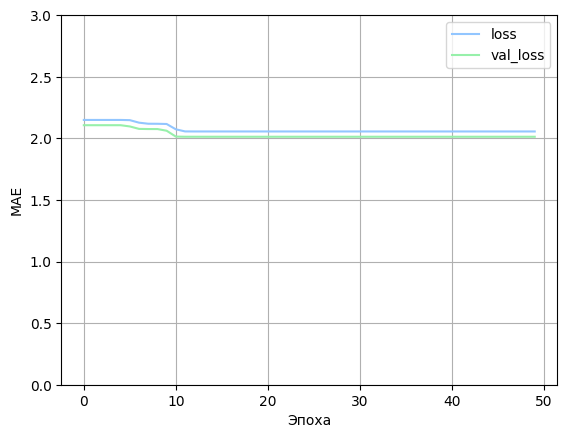

In [86]:
plot_loss(history)

In [84]:
model.evaluate(X_test3, y_test3, verbose=1)

10/10 [==============================] - 0s 3ms/step - loss: 2.1657 - mae: 2.1657


[2.1657445430755615, 2.1657445430755615]